In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


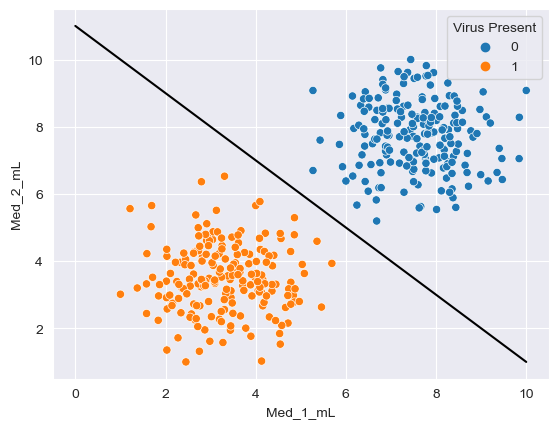

In [20]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", data=df, hue="Virus Present")

#hyperlane 2d
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x +b

plt.plot(x,y,'black')

In [21]:
from sklearn.svm import SVC

In [22]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [23]:
y = df['Virus Present']

In [24]:
X = df.drop('Virus Present', axis=1)

In [25]:
model = SVC(kernel='linear', C=1000)

In [26]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [27]:
def plot_svm_boundary(model,X,y):

    X = X.values
    y = y.values

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()



/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


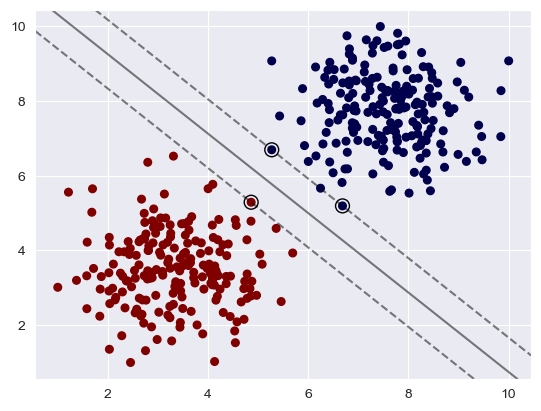

In [28]:
plot_svm_boundary(model, X, y)

In [32]:
model = SVC(kernel='linear', C=0.005)
model.fit(X,y)

SVC(C=0.005, kernel='linear')

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


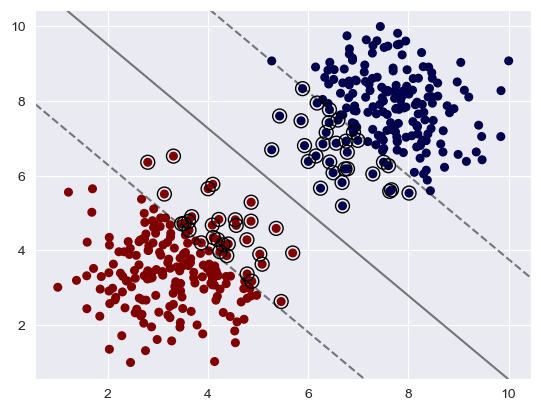

In [33]:
plot_svm_boundary(model, X, y)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


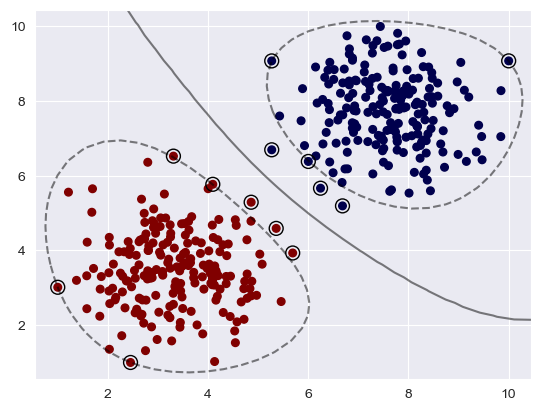

In [46]:
model = SVC(kernel='rbf', C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model, X, y)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


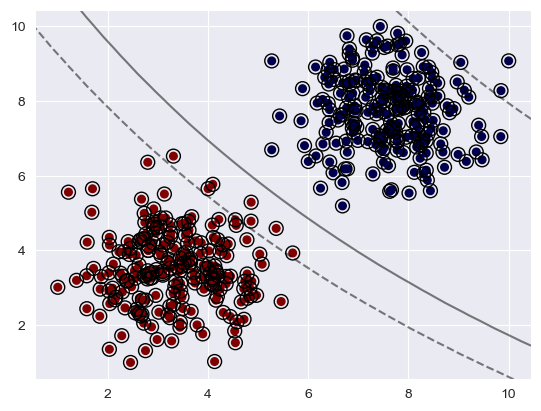

In [47]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model, X, y)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


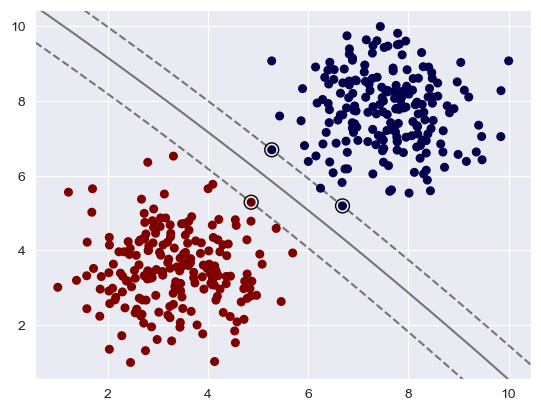

In [50]:
model = SVC(kernel='poly', C=1, degree=3)
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [51]:
from sklearn.model_selection import GridSearchCV

In [54]:
svm = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear', 'rbf'] }

In [55]:
grid = GridSearchCV(svm, param_grid)

In [57]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [58]:
grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

SVM with scikit-learn and Pythin - Regression Tasks

In [60]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

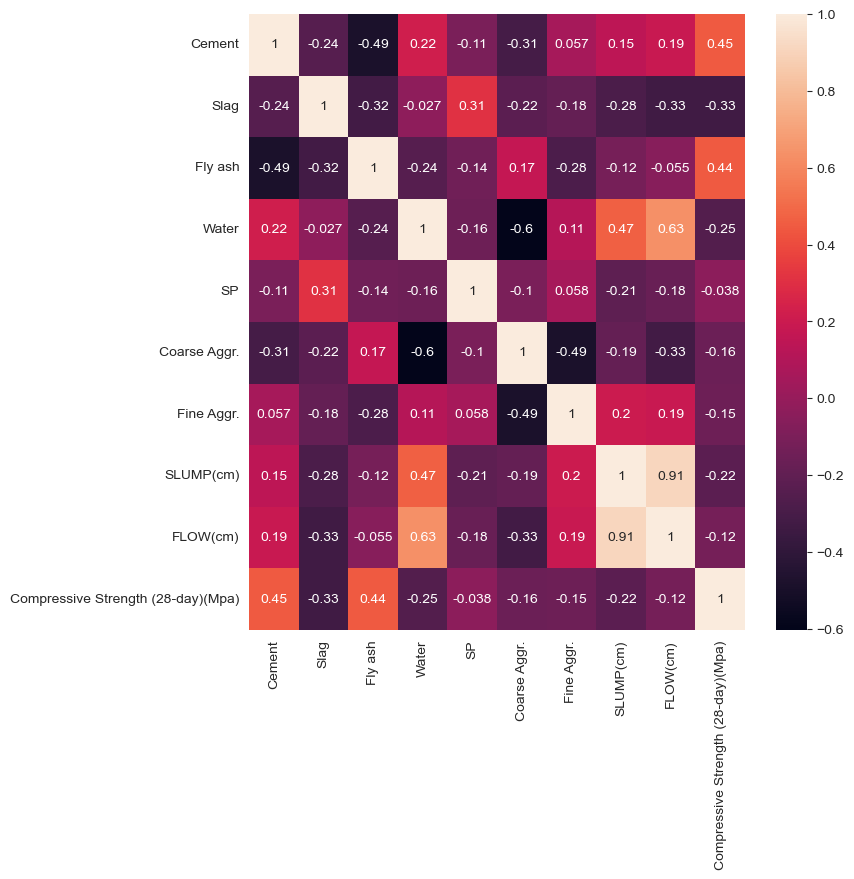

In [64]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df.corr(),annot=True)

In [65]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [66]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [67]:
y = df[ 'Compressive Strength (28-day)(Mpa)']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaled_X_train = scaler.fit_transform(train_X)

In [73]:
scaled_X_test = scaler.transform(test_X)

In [74]:
from sklearn.svm import SVR,LinearSVR

In [75]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [76]:
base_model = SVR()

In [77]:
base_model.fit(scaled_X_train,train_y)

SVR()

In [78]:
base_preds = base_model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
mean_absolute_error(test_y,base_preds)

5.236902091259179

In [81]:
np.sqrt(mean_squared_error(test_y,base_preds))

6.695914838327134

In [83]:
test_y.mean()

36.26870967741935

In [84]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'kernel':['linear', 'rbf', 'poly'],'gamma':['scaled', 'auto'], 'degree':[2,3,4],'epsilon':[0.001, 0.01, 0.1, 0.5, 1,2]}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
svr = SVR()

In [87]:
grid = GridSearchCV(svr,param_grid)

In [88]:
grid.fit(scaled_X_train,train_y)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scaled', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [89]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [90]:
grid_preds = grid.predict(scaled_X_test)

In [91]:
mean_absolute_error(test_y,grid_preds)

2.512801221076102

In [92]:
np.sqrt(mean_squared_error(test_y,grid_preds))

3.1782103051197885